# Problem 1

Simulate $n=500$ data points from the linear model $y_i = \alpha + \beta x_i + \epsilon_i$, where $x_1,...,x_n$ are observations from a random sample $X_1,...,X_n \sim \mathcal{N}^n(14, 25)$ and $\epsilon|x \sim \mathcal{N}^n\left(0, x^{2\gamma} \right)$. Let's assume that the model parameters are $\alpha=4$, $\beta=1$, and $\gamma=0.5$. The goal in this problem is to correctly estimate those parameters.
Remember to use **set.seed()** to make your results replicable. Recall that the parameters of the normal distribution are given in the form $\mathcal{N}(\mu,\sigma^2)$, not $\mathcal{N}(\mu,\sigma)$.

## a)
**Estimate model y = Xβ +ϵ on the simulated data using OLS. Interpret the results. Do you expect any of the OLS assumptions to be violated. If yes, make the corresponding tests, and interpret the results.**

First, we simulate the data.

In [1]:
n=500 # number of samples

set.seed(123) # we keep the same seed, so that the below results are always the same anytime we run the code

x=rnorm(n, mean=14, sd=5) # generate n samples of explanatory var. x with true distribution N(14,5)

# the true parameters are:
alpha=4; beta=1; gamma=0.5


eps=rnorm(n, mean=0, sd=x**gamma) # generate n samples of the error terms epsilon from the true distribution N(0,x^(2 gamma))
y = alpha + beta*x + eps # generate n samples of the dependent variable y based on the true model


Second, we look at the relationship between $x$ and $y$ using a scatter plot.

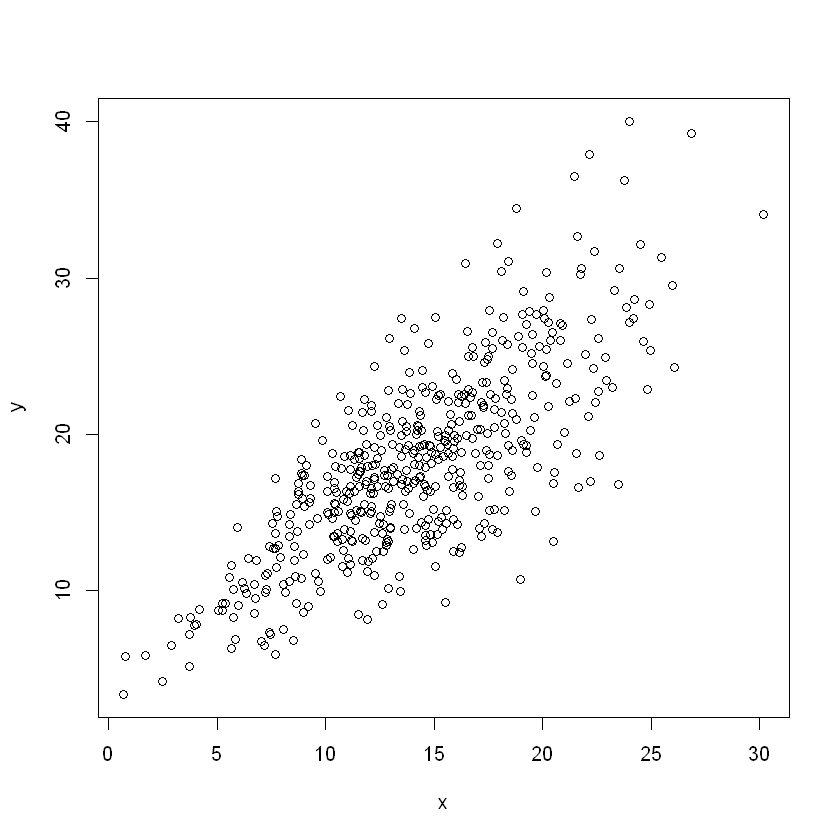

In [2]:
plot(x,y)

Now, let's start modelling.

In [3]:
ols <- lm(y ~ x)
summary(ols)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.965  -2.460   0.003   2.375  12.556 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.65402    0.53318   8.729   <2e-16 ***
x            0.95116    0.03559  26.729   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.866 on 498 degrees of freedom
Multiple R-squared:  0.5892,	Adjusted R-squared:  0.5884 
F-statistic: 714.4 on 1 and 498 DF,  p-value: < 2.2e-16


### Recall

First, it is of upmost importance to know when the use of the OLS estimator on Cross-Sectional data is appropriate. Let's recall the OLS assumptions:

1. *Linearity in Parameters*. The model in the population can be written as $y=\beta X + \epsilon$, where $\epsilon$ is an unobserved random error term and $\beta$ is the unknown vector of parameters of interest.
2. *Random Sampling*. The observations $(X_i,y_i)$: $i=1,...,n$ in our dataset follow the population model in 1. .
3. *No Perfect Collinearity*. In the sample (and therefore in the population), none of the independent variables is constant, and there are no exact linear relationships among the explanatory variables.
4. *Zero Conditional Mean*. $E[\epsilon|X]=0$.
5. *Homoskedasticity*. $V(\epsilon|X) = \sigma^2$.

And on top of that, we could assume:

6. *Normality*. $\epsilon|x \sim \mathcal{N}(0,\sigma^2I_n)$.


### Interpretation

Based on the OLS estimates and the associated tests, the following interpretations hold under the assumptions listed above.

#### Estimates

##### Estimated coefficients
We assumed $y = \alpha + \beta x + \epsilon$ (1., linearity in Parameters). Thus, for a fixed value of $x$, say $x^*$, we have $(y|x=x^*) = \alpha + \beta x + \epsilon$. Applying the expectation, $E[y|x=x^*] = \alpha + \beta x^* + E[\epsilon|x=x^*]$. Since $E[y|x]$ is assumed to be $0$ (4., the exogeneity assumption of OLS), we have in particular $E[\epsilon|x=x^*]=0$. Therefore, $E[y|x=x^*] = \alpha + \beta x^*$ and then:
\begin{equation}
\frac{\partial E[y|x=x^*]}{\partial x^*} = \beta
\end{equation}.
We can therefore write that, all else being equal and on average, an increase of $x^*$ by 1 leads to an increase of $y$ by $\beta$. Using the results from the OLS estimation, all else being equal and on average, an increase of $x^*$ by 1 leads to an increase of $y$ by $\hat\beta \overset{.}{=} 0.95$.

##### Estimated error variance
An unbiased estimator of the error variance, $\sigma^2$ is $s^2=\frac{e'e}{n-K}$, where $e$ is the vector of residuals from our regression, and $K$ is the number of parameters in our model. Under the assumptions 1. to 6., $s^2 \sim \mathcal{X}(n-K)$. Using the OLS results on our dataset, $s^2=3.87$.

#### Hypothesis testing

##### Significance of the constant and the explanatory variables
Under the assumptions 1., 2., 3., and 4., the OLS estimator is unbiased and if we add the assumption 5., it is efficient.
Assuming 1. to 6. and denoting $X=\left(1, x \right)$, we have:

\begin{equation}
\label{eqn:statdist}\tag{1}
t_j=\frac{\hat\beta_j-\beta_j}{\sqrt{s^2 (X'X)^{-1}_{jj}}} \sim \mathcal{T}(n-1)
\end{equation}, for $j=0,1$.

Please note that if the assumption $n \rightarrow \infty$ make sense, 6. can be relaxed and $t_j \overset{d}{\rightarrow} \mathcal{N}(0,1)$.

Thus, assuming 1. to 5. and that $n \rightarrow \infty$ make sense, we can safely test $H_0: \beta_j=0$ against $H_1: \beta_j \neq 0$ with (\ref{eqn:statdist}). From the test results and when choosing a critical probability of $5\%$, we rejected $(H_0)$ for $\beta$. Thus, $x$ is found to be significant in explaining $y$.

##### Joined significance of the constant and the explanatory variables

Assuming 1. to 6., the F-statistic $f \sim \mathcal{F}(K-1,n-k)$. Using the OLS results on our dataset, $f=500.60$.

Thus, assuming 1. to 6., we can safely test $H_0: \alpha=\beta=0$ against $H_1: \alpha \neq 0$ or $\beta \neq 0$. From the test results and when choosing a critical probability of $5\%$, we rejected $(H_0)$. Thus, $x$ is found to be significant in explaining $y$.

#### Goodness-of-fit

The R-squared is defined as $R^2=\frac{SSE}{SST}$, where $SSE$ and $SST$ are the explained sum of squares and the residual sum of squares respectively. On our dataset, we have $R^2 \overset{.}{=} 0.59$.

The adjusted R-squared is defined as $R_a^2=\frac{ \frac{SSE}{n-K} }{ \frac{SST}{n-1} }$. On our dataset, we have $R_a^2 \overset{.}{=} 0.59$.

In theory, a perfect model is when its R-squared equals $1$. Here, we 'just' have $0.59$, meaning that our OLS estimator is probably not efficient.

### OLS assumption(s) violated

1. *Linearity in Parameters*. We don't expect it to be violated because we know that the population model can be written as $y=\beta X + \epsilon$.
2. *Random Sampling*. We don't expect it to be violated because we generated our sample from the population model $y=\beta X + \epsilon$.
3. *No Perfect Collinearity*. We don't expect it to be violated because we know that $x$ is normally distributed and therefore $x$ is not a constant.
4. *Zero Conditional Mean*. We don't expect it to be violated because we know that $\epsilon|x \sim \mathcal{N}(0,x^{2\gamma})$ and therefore $E[\epsilon|x]=0$.
5. *Homoskedasticity*. We expect it to be violated because here $V(\epsilon|x) = x^{2\gamma}$.
6. *Normality*. We don't expect it to be violated because we know that $\epsilon|x \sim \mathcal{N}(0,x^{2\gamma})$ and therefore $\epsilon|x$ is normally distributed.

### Testing for heteroskedasticity

Since we expect the assumption 5. to be violated, we use the Breusch-Pagan test with null hypothesis $(H_0): V(\epsilon|x)=\sigma^2 I_n$ to verify our expectations.

In [4]:
if (!require(lmtest)) install.packages("lmtest")
library(lmtest)

Le chargement a nécessité le package : lmtest

Le chargement a nécessité le package : zoo


Attachement du package : 'zoo'


Les objets suivants sont masqués depuis 'package:base':

    as.Date, as.Date.numeric




In [5]:
bptest(ols, studentize=F)


	Breusch-Pagan test

data:  ols
BP = 45.492, df = 1, p-value = 1.533e-11


Choosing a critical probability of $5\%$, we reject $(H_0)$ and therefore suspect heteroskedasticity.

All interpretations on the estimated standard errors of the estimated coefficients and the tests from the OLS estimation are therefore not reliable, but we can trust the coefficient estimates because we have an unbiased and consistent OLS estimator since assumptions 1. to 4. are not violated.

\**Note: Providing **studentize=False** to the bptest R function run the Breusch-Pagan test while providing **studentize=True** run the Koenker (1981) test. The Breusch-Pagan test assumes that the errors are normally distributed. Please note that we provide **studentize=False** to the bptest R function because we know that the errors are normally distributed. However, in real study cases, it is advised to use the Koenker (1981) test for its greater applicability.*

## b)
**Reestimate the model using GLS using your knowledge about the $\Omega$ matrix. State which form the variance-covariance matrix $\Omega$ takes. Also, please state the form of the weighting matrix $\Omega^{−1}$. Comment on the results from GLS regression.**

Since we know that we have heteroskedasticity, it is more appropriate to apply the GLS estimator than the OLS estimator. In fact, we have $\epsilon|x \sim \mathcal{N}(0,x^{2\gamma})$ and therefore $V(\epsilon|x) = x^{2\gamma}$. Using $\Omega=\begin{pmatrix}
x_1^{2\gamma} &  & (0)\\
 & x_i^{2\gamma} & \\
(0) &  & x_n^{2\gamma}
\end{pmatrix}$, the associated GLS estimator is efficient.

The GLS estimator is $\tilde\beta= (X'\Omega^{-1}X)^{-1}X'\Omega^{-1}y$. In order to get $\Omega^{-1}$, we have to use one of the properties of symmetric positive definite matrices: If $\Omega \in \mathcal{M}_{n,n}(\mathbb{R})$ is a symmetric positive definite matrix, then there exists $P \in \mathcal{T}^{I}_{n,n}(\mathbb{R})$ such that $P'P=\Omega^{-1}$, where $\mathcal{T}^{I}_{n,n}(\mathbb{R})$ denotes the ensemble of triangular and invertible squared real matrices of size $n$. Since $P$ is invertible, we have $\Omega=P^{-1} (P')^{-1}$ and therefore:

$P=\begin{pmatrix}
\frac{1}{x_1^{\gamma}} &  & (0)\\
 & \frac{1}{x_i^{\gamma}} & \\
(0) &  & \frac{1}{x_n^{\gamma}}
\end{pmatrix}$ and $\Omega^{-1}=\begin{pmatrix}
\frac{1}{x_1^{2\gamma}} &  & (0)\\
 & \frac{1}{x_i^{2\gamma}} & \\
(0) &  & \frac{1}{x_n^{2\gamma}}
\end{pmatrix}$



In [6]:
w <- 1 / x**(2*gamma)
gls <- lm(y ~ x, weights = w)
summary(gls)


Call:
lm(formula = y ~ x, weights = w)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-2.7874 -0.6740  0.0114  0.6596  2.7069 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.13764    0.34603   11.96   <2e-16 ***
x            0.98760    0.02721   36.29   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.012 on 498 degrees of freedom
Multiple R-squared:  0.7256,	Adjusted R-squared:  0.7251 
F-statistic:  1317 on 1 and 498 DF,  p-value: < 2.2e-16


### Interpretation

We follow the same reasoning as question a) but this time considering $\sigma_i=x_i^\gamma$ for each $i=1,...,n$ for the tests.

#### Estimates

Same as question a).

#### Hypothesis testing

##### Significance of the constant and the explanatory variables

From the test results and when choosing a critical probability of $5\%$, we rejected $(H_0)$ for $\beta$. Thus, $x$ is found to be significant in explaining $y$.

##### Joined significance of the constant and the explanatory variables

From the test results and when choosing a critical probability of $5\%$, we rejected $(H_0)$. Thus, $x$ is found to be significant in explaining $y$.

#### Goodness-of-fit

We have a better adjusted R-squared of $0.72$ compared to the OLS. Why ? We know that assumptions 1. to 4. are not violated and we corrected the heteroskedasticity with the GLS estimator. Therefore, assumptions 1. to 5. (also known as the Gauss-Markov assumptions) are satistified by the GLS estimator. Thus, the GLS estimator is the Best Linear Unbiased Estimator (BLUE), i.e., it has the minimum variance among the linear and unbiased estimators.

## c)
**Estimate FGLS model for heteroskedasticity of the form $V(\epsilon_i|x_i)=h(x_i)$ (recall the food expenditure example from seminar 7).**

It is great if GLS was always applicable in real-world applications, but it isn't the case. We only use GLS when we have a strong idea of the form of $V(\epsilon|x)$, which is not often the case. FGLS exists to make GLS feasible. Assuming that we don't have a strong idea of the form of heteroskedasticity, below we apply FGLS.

In [34]:
ehatsq <- resid(ols)^2
sighatsq <- lm(log(ehatsq) ~ x)
w <- exp(fitted(sighatsq))
fgls <- lm(y ~ x, weights = 1/w)
summary(fgls)


Call:
lm(formula = y ~ x, weights = 1/w)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-5.4067 -1.3144 -0.0021  1.2652  5.4899 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.46047    0.44124   10.11   <2e-16 ***
x            0.96595    0.03329   29.02   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.991 on 498 degrees of freedom
Multiple R-squared:  0.6283,	Adjusted R-squared:  0.6276 
F-statistic: 841.9 on 1 and 498 DF,  p-value: < 2.2e-16


You may see that the FGLS estimator has an efficiency slightly lower than the GLS estimator. In our case, we perfectly know the form of the heteroskedasticity. Thus, the GLS with the appropriate variance-covariance matrix is efficient. In this case, FGLS can only be as good as GLS, not more efficient.

## d)
**In the OLS model, estimate standard errors using White heteroscedasticity consistent estimator. Compare White’s standard errors to those from OLS, GLS, and FGLS.**

Under assumptions 1. to 5., conditional on the sample values of the independant variables, 

\begin{equation}
V(\hat\beta^{OLS}_j)=\frac{\sigma^2}{SST_j (1-R^2_j)}
\end{equation},

where $SST_j=\sum_{i=1}^n (x_{ij}-\bar{x}_j)^2$ is the total sample variation in $x_j$ and $R^2_j$ is the R-squared from regressing $x_j$ on all other independant variables (and including an intercept).

Now that the variance-covariance matrix is no longer $\sigma^2 I_n$ but $\sigma^2 \Omega$, we would like to estimate:


\begin{equation}
V(\hat\beta_{OLS})=\frac{ \sum_{i=1}^n (x_i-\bar{x})^2 \sigma_i^2 }{SST^2_x}
\end{equation},

where $SST_x=\sum_{i=1}^n (x_i-\bar{x})^2$ is the total sum of squares of the $x_i$.

White (1980) showed that a valid estimator of $V(\hat\beta_{OLS})$, for heteroskedasticity of any form, is

\begin{equation}
\hat{V}(\hat\beta_{OLS})=\frac{ \sum_{i=1}^n (x_i-\bar{x})^2 e^2_i }{SST^2_x}
\end{equation}.

In [8]:
if (!require(sandwich)) install.packages("sandwich")
library(sandwich)

Le chargement a nécessité le package : sandwich



### White's heteroskedasticity consistent estimator of estimated coefficient standard errors

In [9]:
cov = vcovHC(ols, type = 'HC') # that where the variances of the beta s are estimated

robustsummary <- matrix(0, nrow = 2, ncol = 4)
colnames(robustsummary) <- c('Coefficient', 'Std. Error', 't value', 'p-value')
robustsummary[, 1] <- coef(ols)
robustsummary[, 2] <- sqrt(diag(cov))
robustsummary[, 3] <- (robustsummary[, 1] / robustsummary[, 2])
robustsummary[, 4]<- 2 * pt(abs(robustsummary[, 3]), 998, lower=FALSE)
robustsummary

Coefficient,Std. Error,t value,p-value
4.6540245,0.47773791,9.741794,1.747692e-21
0.9511643,0.03683588,25.821680,5.153413e-113


### OLS estimates of estimated coefficient standard errors

In [10]:
olssummary <- matrix(0, nrow = 2, ncol = 4)
colnames(olssummary) <- c('Coefficient', 'Std. Error', 't value', 'p-value')
olssummary[, 1] <- coef(ols)
olssummary[, 2] <- sqrt(diag(vcov(ols)))
olssummary[, 3] <- (olssummary[, 1] / olssummary[, 2])
olssummary[, 4]<- 2 * pt(abs(olssummary[, 3]), 998, lower=FALSE)
olssummary

Coefficient,Std. Error,t value,p-value
4.6540245,0.5331769,8.728856,1.065163e-17
0.9511643,0.0355861,26.728537,3.861579e-119


### GLS estimates of estimated coefficient standard errors

In [11]:
glssummary <- matrix(0, nrow = 2, ncol = 4)
colnames(glssummary) <- c('Coefficient', 'Std. Error', 't value', 'p-value')
glssummary[, 1] <- coef(gls)
glssummary[, 2] <- sqrt(diag(vcov(gls)))
glssummary[, 3] <- (glssummary[, 1] / glssummary[, 2])
glssummary[, 4]<- 2 * pt(abs(glssummary[, 3]), 998, lower=FALSE)
glssummary

Coefficient,Std. Error,t value,p-value
4.1376432,0.34603419,11.95732,6.841397e-31
0.9875986,0.02721278,36.29172,1.483483e-184


### FGLS estimates of estimated coefficient standard errors

In [12]:
fglssummary <- matrix(0, nrow = 2, ncol = 4)
colnames(fglssummary) <- c('Coefficient', 'Std. Error', 't value', 'p-value')
fglssummary[, 1] <- coef(fgls)
fglssummary[, 2] <- sqrt(diag(vcov(fgls)))
fglssummary[, 3] <- (fglssummary[, 1] / glssummary[, 2])
fglssummary[, 4]<- 2 * pt(abs(fglssummary[, 3]), 998, lower=FALSE)
fglssummary

Coefficient,Std. Error,t value,p-value
4.4604707,0.44123865,12.89026,2.808524e-35
0.9659513,0.03329118,35.49624,3.873694e-179


As said before, the variances of the OLS estimates are not valid/reliable. Comparing the estimated coefficient standard errors from the White consistent estimator and the (F)GLS estimators, the GLS estimator is the most efficient one which is in line with the outcome of the Gauss-Markov theorem.


# Problem 2


Please use the data in the **plm** R package with the next R command to answer following questions. Estimate your models based on specification

\begin{equation}
    lwage_{it}= \beta_0 + \beta_1 exp_{it} + \beta_2 exp^2_{it} + \beta_3 sex_{it} + \beta_4 ed_{it} + \beta_5 south_{it} + \beta_6 smsa_{it} + \beta_7 black_{it} + u_{it}
\end{equation},

where $i$ is indicated by *id* variable, $t$ is indicated by *time* variable. The dependent variable is natural logarithm of wage, *exp* indicates working experience, *ed* indicates years of education, *smsa* is a dummy variable for individuals living in urban areas, *sex* is a dummy variable indicating female workers.
  
**Your task is to find out, whether education is a significant determinant of wages. Please use the standard panel estimation methods (Pooled OLS, Fixed Effects, and Random effects models), and perform all the necessary tests. For each estimator, state the conditions under which it is valid. What are your conclusions? What additional estimation would you suggest?**


Let's first recall the assumptions for each of the listed models for Panel Data.

**Pooled OLS**

Same as Problem 1.

**Fixed Effects Model**

1. For each $i$, the model is $y_{it} = \beta_1 x^1_{it} + ... + \beta_k x^k_{it}$, $t = 1,...,T$,
where the $\beta_j$ are the parameters to estimate and $a_i$ is the unobserved effect.
2. We have a random sample from the cross section.
3. Each explanatory variable changes over time (for at least some i ), and no perfect linear relationships exist among the explanatory variables.
4. For each $t$, the expected value of the idiosyncratic error given the explanatory variables in all time periods and the unobserved effect is zero: $E(u_{it} | X_i,a_i) = 0$.
5. $V(u_{it} | X_i,ai) = Var(u_{it}) = \sigma^2_u$, for all $t = 1,...,T$.
6. For all $t \neq s$, the idiosyncratic errors are uncorrelated (conditional on all explanatory variables and $a_i$): $Cov(u_{it},u_{is} | X_i, a_i) = 0$.
7. Conditional on $X_i$ and $a_i$, the $u_{it}$ are independent and identically distributed as $\mathcal{N}(0,\sigma_u^2)$.

Under 1. to 4., the Fixed Effects (FE) estimator is unbiaised. Under 1. to 4., the FE estimator is consistent as long as $T$ is fixed as $N \rightarrow \infty$.

Under 1. to 6., the FE estimator is BLUE.

Under 1. to 7., the t and F statistics have exact t and F distributions. Without 7., we can rely on asymptotic approximations as long as $N$ is large and $T$ is small.


**Random Effects Model**

1. For each $i$, the model is $y_{it} = \beta_1 x^1_{it} + ... + \beta_k x^k_{it}$, $t = 1,...,T$,
where the $\beta_j$ are the parameters to estimate and $a_i$ is the unobserved effect.
2. We have a random sample from the cross section.
3. There are no perfect linear relationships among the explanatory variables. The cost of allowing time-constant regressors is that we must add assumptions about how the unobserved effect, $a_i$, is related to the explanatory variables.
4. $E(u_{it} | X_i,a_i) = 0$ and, the expected value of $a_i$ given all explanatory variables is constant: $E(a_i|X_i) =\beta_0$.
5. $V(u_{it} | X_i,ai) = Var(u_{it}) = \sigma^2_u$, for all $t = 1,...,T$, and FE.5, the variance of ai given all explanatory variables is constant: $V(a_i | X_i)=\sigma_a^2$.
6. For all $t \neq s$, the idiosyncratic errors are uncorrelated (conditional on all explanatory variables and $a_i$): $Cov(u_{it},u_{is} | X_i, a_i) = 0$.

Under 1. to 4., the RE estimator is consistent and asymptotically normally distributed as $N$ gets large for fixed $T$.

Under 1. to 6., the RE standard errors and test statistics are valid. Also, the RE estimators are asymptotically efficient.


We first load the data.

In [13]:
if (!require(plm)) install.packages("plm")

library(plm)
data("Wages", package = "plm")
Wag <- pdata.frame(Wages, index=595)

Le chargement a nécessité le package : plm



The first step in any modelling problem is to analyze the data. Let's see a summary of the data.

In [14]:
summary(Wag)

      exp             wks        bluecol         ind         south     
 Min.   : 1.00   Min.   : 5.00   no :2036   Min.   :0.0000   no :2956  
 1st Qu.:11.00   1st Qu.:46.00   yes:2129   1st Qu.:0.0000   yes:1209  
 Median :18.00   Median :48.00              Median :0.0000             
 Mean   :19.85   Mean   :46.81              Mean   :0.3954             
 3rd Qu.:29.00   3rd Qu.:50.00              3rd Qu.:1.0000             
 Max.   :51.00   Max.   :52.00              Max.   :1.0000             
                                                                       
  smsa      married        sex       union            ed        black     
 no :1442   no : 773   male  :3696   no :2649   Min.   : 4.00   no :3864  
 yes:2723   yes:3392   female: 469   yes:1516   1st Qu.:12.00   yes: 301  
                                                Median :12.00             
                                                Mean   :12.85             
                                                3

Let's see if there are differences across time.

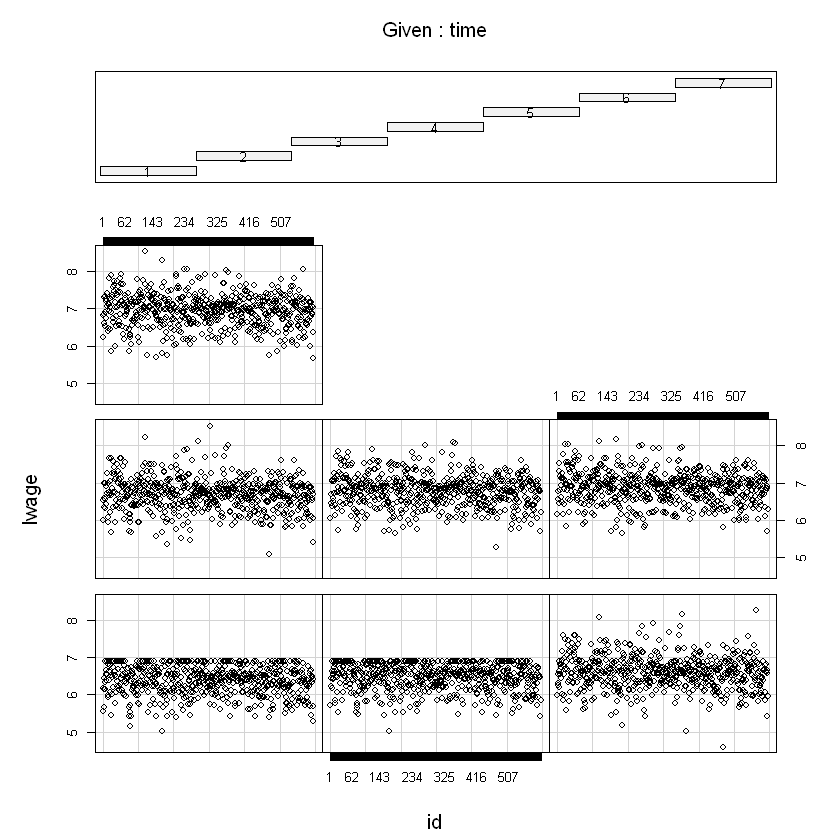

In [15]:
coplot(lwage ~ id|time, data = Wag)

First you use the Pooled OLS estimator because that's the first model you may think about.

In [16]:
pols = plm(
    lwage~exp+I(exp**2)+sex+ed+south+smsa+black,
    index=c('id','time'), model="pooling", data=Wag)
summary(pols)

Pooling Model

Call:
plm(formula = lwage ~ exp + I(exp^2) + sex + ed + south + smsa + 
    black, data = Wag, model = "pooling", index = c("id", "time"))

Balanced Panel: n = 595, T = 7, N = 4165

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-2.2121430 -0.2328048 -0.0021319  0.2340662  2.0421768 

Coefficients:
               Estimate  Std. Error  t-value  Pr(>|t|)    
(Intercept)  5.3293e+00  3.6005e-02 148.0148 < 2.2e-16 ***
exp          4.2775e-02  2.1752e-03  19.6642 < 2.2e-16 ***
I(exp^2)    -7.2209e-04  4.7965e-05 -15.0544 < 2.2e-16 ***
sexfemale   -4.2420e-01  1.7978e-02 -23.5953 < 2.2e-16 ***
ed           6.5286e-02  2.0955e-03  31.1553 < 2.2e-16 ***
southyes    -6.9485e-02  1.2436e-02  -5.5874 2.452e-08 ***
smsayes      1.7062e-01  1.2094e-02  14.1077 < 2.2e-16 ***
blackyes    -1.8012e-01  2.2220e-02  -8.1063 6.802e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    886.9
Residual Sum of Squares: 524.21
R-S

Then, you think maybe there is heteroskedasticity among individuals. So, you run the robust standard error estimates for statistical inference.

In [17]:
coeftest(pols, vcov = vcovHC(pols, type = "HC0", cluster = "group"))


t test of coefficients:

               Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept)  5.3293e+00  7.9804e-02  66.7806 < 2.2e-16 ***
exp          4.2775e-02  4.3314e-03   9.8756 < 2.2e-16 ***
I(exp^2)    -7.2209e-04  9.8662e-05  -7.3188 2.987e-13 ***
sexfemale   -4.2420e-01  3.1539e-02 -13.4498 < 2.2e-16 ***
ed           6.5286e-02  4.7120e-03  13.8555 < 2.2e-16 ***
southyes    -6.9485e-02  2.6680e-02  -2.6044  0.009238 ** 
smsayes      1.7062e-01  2.5507e-02   6.6893 2.540e-11 ***
blackyes    -1.8012e-01  4.5735e-02  -3.9383 8.340e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


But, now that you think more about the problem and you may wonder if there are unobserved effects. If so, the Pooled OLS estimator is inconsistent. Thus you use the F-test to test the presence of unobserved effects.

In [18]:
fem = plm(
    lwage~exp+I(exp**2)+sex+ed+south+smsa+black,
    index=c('id','time'), model="within", effect = 'individual', data=Wag)
summary(fem)

Oneway (individual) effect Within Model

Call:
plm(formula = lwage ~ exp + I(exp^2) + sex + ed + south + smsa + 
    black, data = Wag, effect = "individual", model = "within", 
    index = c("id", "time"))

Balanced Panel: n = 595, T = 7, N = 4165

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-1.8120080 -0.0504228  0.0039655  0.0607171  1.9430322 

Coefficients:
            Estimate  Std. Error t-value  Pr(>|t|)    
exp       1.1380e-01  2.4655e-03 46.1575 < 2.2e-16 ***
I(exp^2) -4.2839e-04  5.4499e-05 -7.8605 5.026e-15 ***
southyes  5.3877e-03  3.4186e-02  0.1576   0.87478    
smsayes  -4.3365e-02  1.9399e-02 -2.2354   0.02546 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    240.65
Residual Sum of Squares: 82.562
R-Squared:      0.65692
Adj. R-Squared: 0.59939
F-statistic: 1707.05 on 4 and 3566 DF, p-value: < 2.22e-16

In [19]:
pFtest(fem, pols)


	F test for individual effects

data:  lwage ~ exp + I(exp^2) + sex + ed + south + smsa + black
F = 32.277, df1 = 591, df2 = 3566, p-value < 2.2e-16
alternative hypothesis: significant effects


We reject the null hypothesis of no significant individual effect for a critical probability of 5\%.

But now, you don't know whether this unobserved effect is correlated or not to the disturbances. In other words, you don't know whether you should use the Fixed Effects (FE) model or the Random Effects (RE) model. So you use the Hausman type test to test for random effects. The null hypothesis $(H_0)$ is that the unobserved effects are exogeneous (i.e., $Cov(x_{itj},a_i)=0$, $t=1,...,T$, $j=1,...,k$).

In [20]:
rem = plm(
    lwage~exp+I(exp**2)+sex+ed+south+smsa+black,
    index=c('id','time'), model="random", data=Wag)
summary(rem)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = lwage ~ exp + I(exp^2) + sex + ed + south + smsa + 
    black, data = Wag, model = "random", index = c("id", "time"))

Balanced Panel: n = 595, T = 7, N = 4165

Effects:
                  var std.dev share
idiosyncratic 0.02315 0.15216 0.239
individual    0.07386 0.27176 0.761
theta: 0.793

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-2.0620658 -0.1147357  0.0083296  0.1202484  2.0863357 

Coefficients:
               Estimate  Std. Error  z-value  Pr(>|z|)    
(Intercept)  4.16329227  0.08165324  50.9875 < 2.2e-16 ***
exp          0.08377489  0.00284146  29.4830 < 2.2e-16 ***
I(exp^2)    -0.00081571  0.00006273 -13.0033 < 2.2e-16 ***
sexfemale   -0.27605996  0.04819024  -5.7285 1.013e-08 ***
ed           0.10348971  0.00550150  18.8112 < 2.2e-16 ***
southyes    -0.01686609  0.02677860  -0.6298 0.5288027    
smsayes     -0.01421970  0.02006775  -0.7086 0.4785822

In [21]:
phtest(fem, rem)


	Hausman Test

data:  lwage ~ exp + I(exp^2) + sex + ed + south + smsa + black
chisq = 5347.6, df = 4, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


Rejecting $(H_0)$ implies that it is better to use the FE model. A failure to reject $(H_0)$ means that you can use both FE and RE models.

Here, $(H_0)$ is strongly rejected for any critical probability greater than $10^{-15}$ implying that we should use the FE model.

Thus, you come back to the results of the FE model and look for the coefficient of the education (*ed*). It is not there, why ? Because the education is constant over time for all individuals in the dataset. As a result, the FE model removes it, it is his job. Now you wonder how you could get the estimated coefficient of the education and you think about the Hausman-Taylor estimator from Seminar 9.

In [22]:
ht = plm(
    lwage~ed + exp + I(exp^2) + smsa + union + black |
          exp + I(exp^2) + union + black,
    index=c('id','time'), model="ht", data=Wag
)
summary(ht)

Warning message:
"uses of 'pht()' and 'plm(., model = "ht")' are discouraged, better use 'plm(., model = "random", random.method = "ht", inst.method = "baltagi"/"am"/"bms")' for Hausman-Taylor, Amemiya-MaCurdy, and Breusch-Mizon-Schmidt estimator"


Oneway (individual) effect Hausman-Taylor Model 
(Hausman-Taylor estimator) 

Call:
pht(formula = lwage ~ ed + exp + I(exp^2) + smsa + union + black | 
    exp + I(exp^2) + union + black, data = Wag, index = c("id", 
    "time"))

T.V. exo  : exp, I(exp^2), union
T.V. endo : smsa
T.I. exo  : black
T.I. endo : ed

Balanced Panel: n = 595, T = 7, N = 4165

Effects:
                 var std.dev share
idiosyncratic 0.0231  0.1520 0.008
individual    2.9886  1.7288 0.992
theta: 0.9668

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-1.9374390 -0.0633492  0.0098038  0.0757407  1.9865139 

Coefficients:
               Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept) -3.40998053  0.96164159 -3.5460 0.0003911 ***
ed           0.62823847  0.07386769  8.5049 < 2.2e-16 ***
exp          0.11264964  0.00243720 46.2210 < 2.2e-16 ***
I(exp^2)    -0.00044269  0.00005386 -8.2193 < 2.2e-16 ***
smsayes     -0.04612503  0.01915121 -2.4085 0.0160197 *  
unionyes     0.03984787  0.0

This time, you have the estimated coefficient for education and your task was to tell whether education is a significant determinant of wages. Looking at the results from the Hausman-Taylor estimator, the null hypothesis $(H_0): \beta_{ed}=0$ is strongly rejected for a critical probability of $5\%$. Therefore, education is a significant determinant of wages.

# Problem 3

Please use the data in the **plm** R package, and create a subsample containing all individuals for the second year of observation (i.e., *time*=2). Hence, you should estimate a model of following specification on a cross-sectional subsample:

\begin{eqnarray*}
   ln(wage_i)= \beta_0 + \beta_1 ed_i + \beta_2 smsa_i + \beta_3 black_i + u_i.
\end{eqnarray*}

**Test for the group specific heteroskedasticity based on the outcome of *black* variable. Construct an FGLS estimator efficient in presence of such relationship. Remember Seminar 7.**

First we select the corresponding observations in the requested year (i.e., when *time*=2) and make sure that the variables are in the correct format. The first rows of the subsample are show below.

In [23]:
fixed_year = 2
swages = Wag[Wag$time==fixed_year,c('lwage','ed','smsa','black')]
swages<-data.frame(swages)
numcols <- c('lwage','ed'); faccols <- c('smsa','black')
swages[numcols] <- lapply(swages[numcols], FUN=as.numeric)
swages[faccols] <- lapply(swages[faccols], FUN=as.factor)

head(swages)

,lwage,ed,smsa,black
,<dbl>,<dbl>,<fct>,<fct>
1,5.72031,9,no,no
2,6.21461,11,no,no
3,6.43615,12,no,no
4,6.23832,10,yes,yes
5,6.62007,16,no,no
6,6.90575,12,yes,no


Below a summary of the subsample. It is highly recommanded to have at least an overview of the data.

In [24]:
summary(swages)

     lwage             ed         smsa     black    
 Min.   :5.011   Min.   : 4.00   no :198   no :552  
 1st Qu.:6.235   1st Qu.:12.00   yes:397   yes: 43  
 Median :6.534   Median :12.00                      
 Mean   :6.465   Mean   :12.85                      
 3rd Qu.:6.753   3rd Qu.:16.00                      
 Max.   :6.906   Max.   :17.00                      

The following R packages will be used to display the graphics.

In [25]:
if (!require(ggplot2)) install.packages("ggplot2")
if (!require(tidyverse)) install.packages("tidyverse")
if (!require(Hmisc)) install.packages("Hmisc")

library(Hmisc)
library(tidyverse)
library(ggplot2)

options(repr.plot.width = 15, repr.plot.height =8) # adjust the size of the following graphs

Le chargement a nécessité le package : ggplot2

Le chargement a nécessité le package : tidyverse

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between() masks plm::between()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks plm::lag(), stats::lag()
✖ dplyr::lead()    masks plm::lead()
Le chargement a nécessité le package : Hmisc

Le chargement a nécessité le package : lattice

Le chargement a nécessité le package : survival

Le chargement a nécessité le package : Formula


Attachement du package : 'Hmisc'


Les objets suivants sont masqués depuis 'package:dplyr':

    src, summarize


Les objets suivants sont masqués depuis 'package:b

To get a first idea of whether we have group specific heteroskedasticity in your data, we can plot the dependent variable against the explanatory variables for each group.

The optimal situation to fully vizualise the variance of the dependent variable is when we have one or two explanatory variables (excluding the one for which we suspect group specific heteroskedasticity). In this situation, we can make a plot in 2D or 3D to fully vizualise the wage against the explanatory variables.

But here and in the vast majority of study cases, you'll have more than two explanatory variables, so you can't fully vizualise the relationship between the wage and the explanatory variables. Therefore, we are constrained to plot the dependent variable against each of the independent variables for each group.\*

\**Note: Actually, there exists the Principal Component Analysis (PCA) to summarise the data and we are able to get some information on the relationships between each variable, but that's out of the scope of this class.*

Warning message:
"Combining variables of class <pseries> and <factor> was deprecated in ggplot2 3.4.0.
ℹ Please ensure your variables are compatible before plotting (location: `join_keys()`)"
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


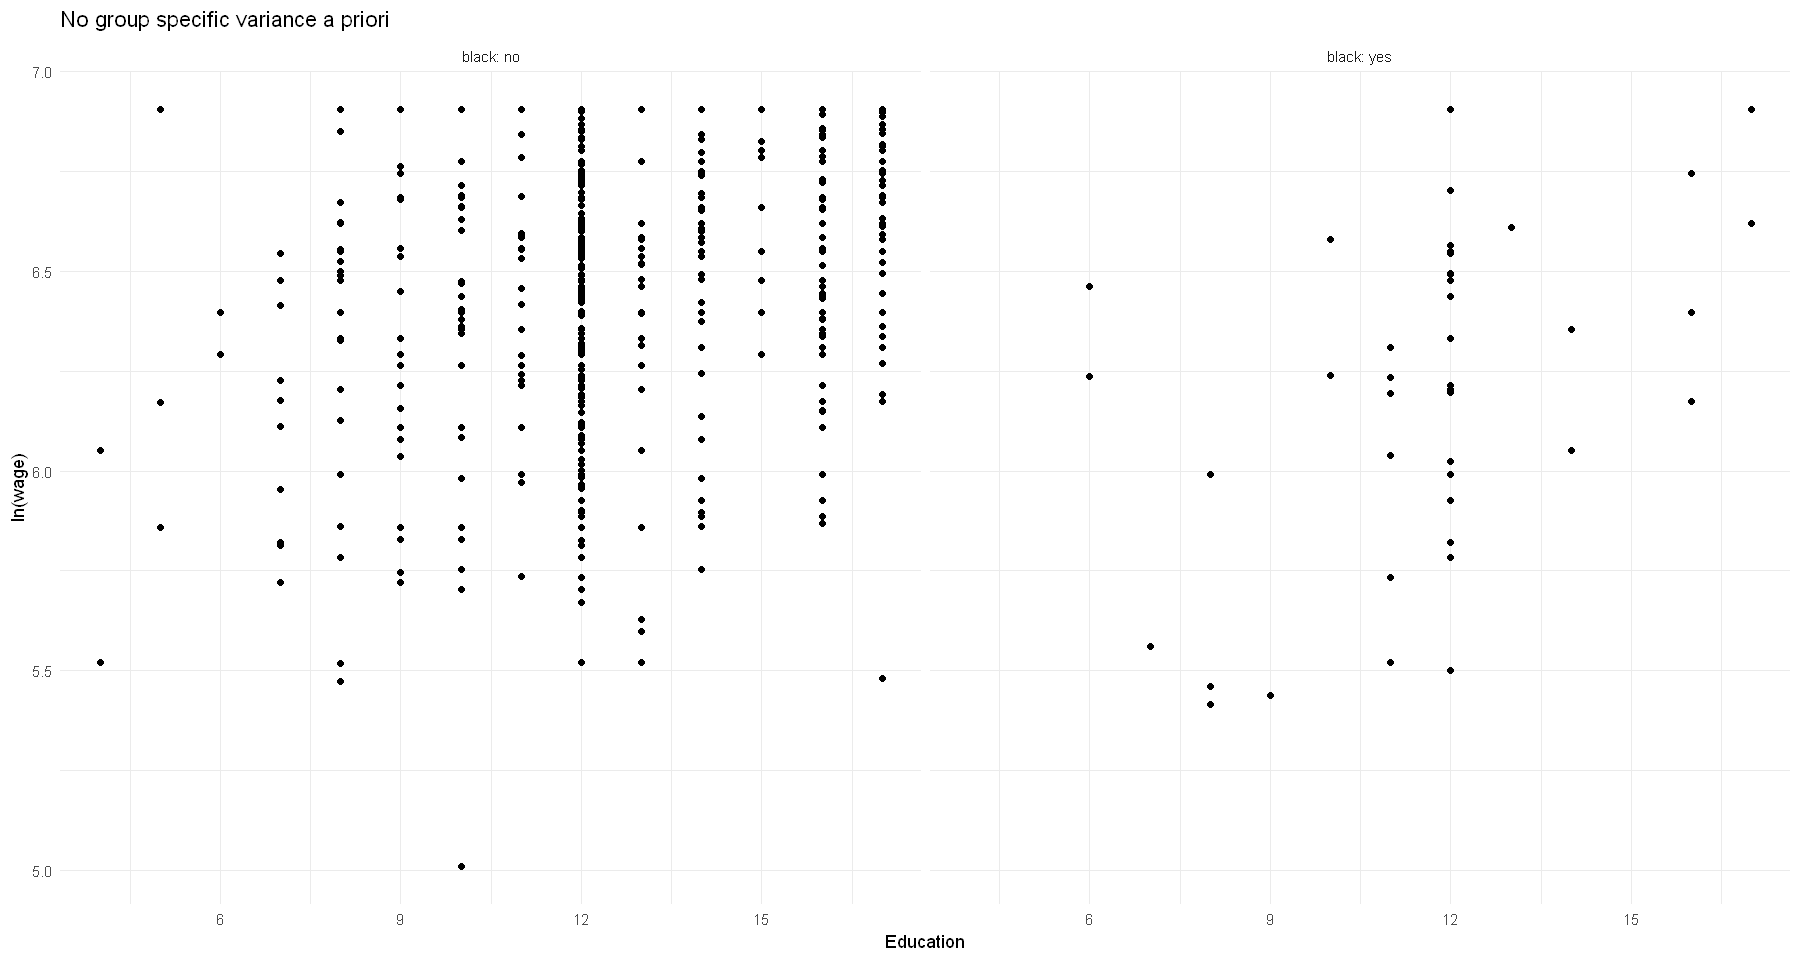

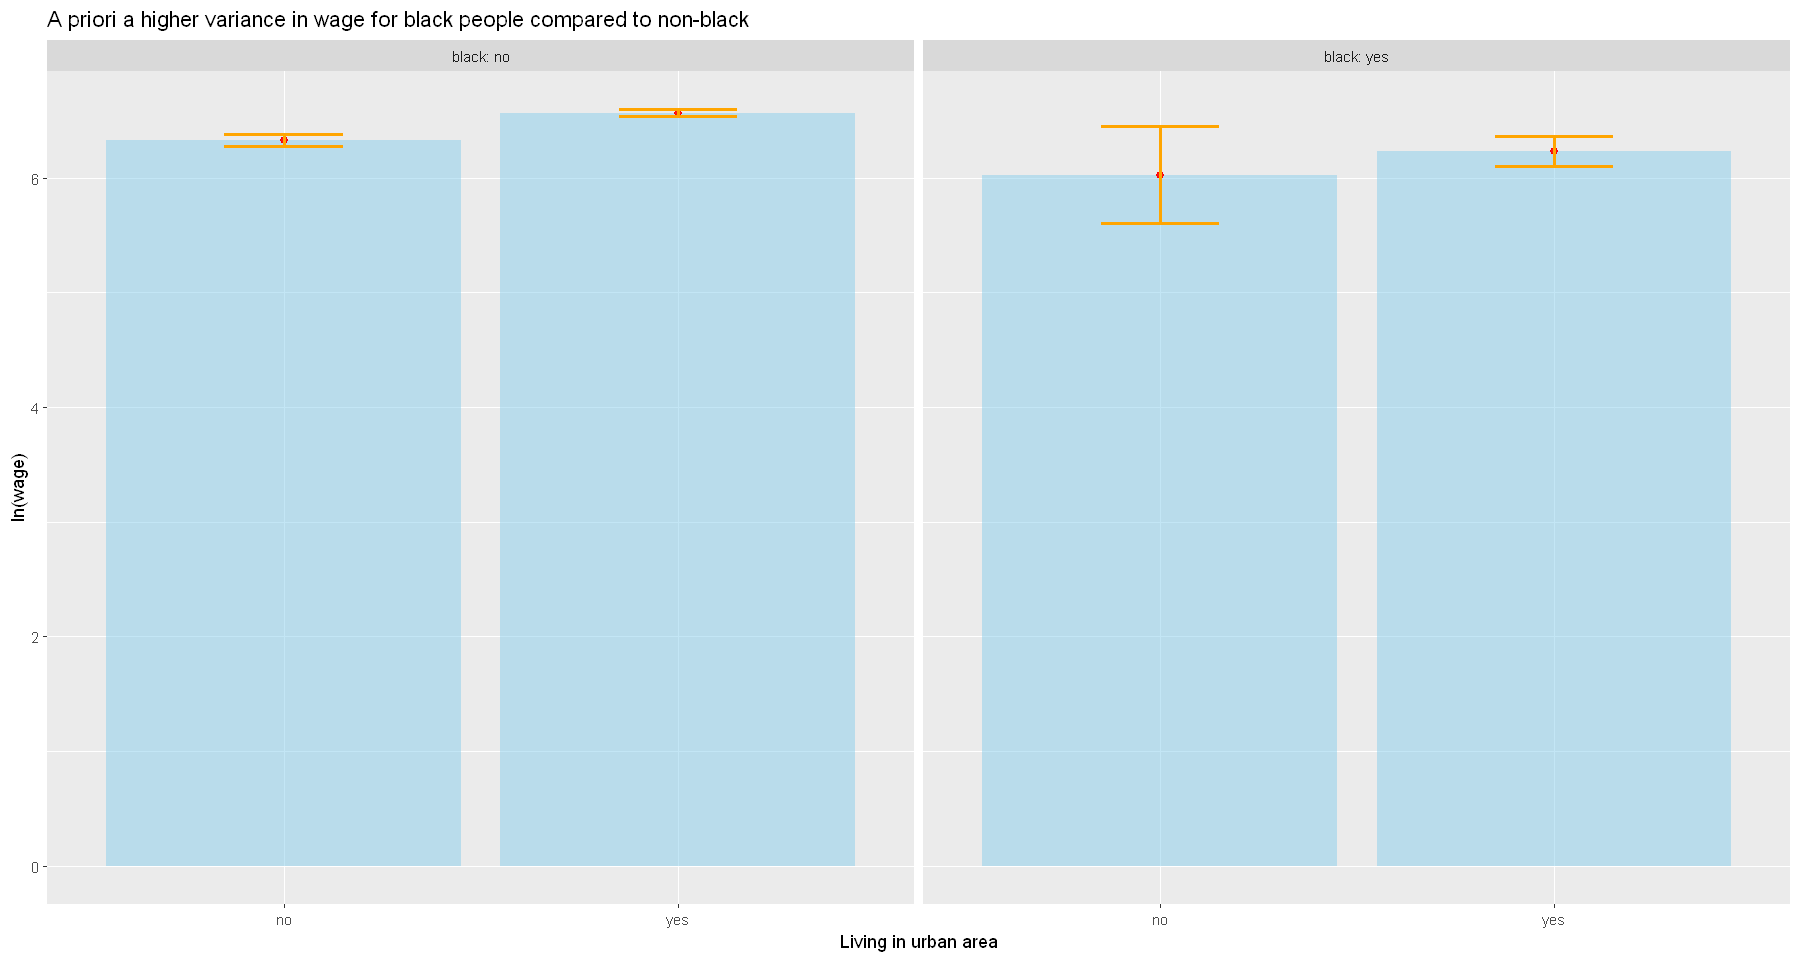

In [26]:
swages %>% 
  ggplot(aes(x = ed, y = lwage)) +
  geom_point() + 
  labs(x='Education',y='ln(wage)', title='No group specific variance a priori') +
  theme_minimal() + 
  facet_wrap(~black, labeller = label_both)


swages %>% 
  ggplot(aes(x = smsa, y = lwage)) +
  stat_summary(fun = "mean", geom = "bar", alpha = .5, fill="skyblue") +
  stat_summary(fun = "mean", geom = "point", colour="red", alpha=.9, size=2) +
  stat_summary(fun.data = "mean_cl_normal", geom = "errorbar", width=0.3, colour='orange', size=1.1) + 
  labs(x='Living in urban area',y='ln(wage)', title='A priori a higher variance in wage for black people compared to non-black') + 
  facet_wrap(~black, labeller = label_both)

The first two plots regarding the relationship between the wage and the education don't advocate for heteroskedasticity between the two groups (i.e., *black* vs *not black*). However, we can suspect it from the two graphs on the living place.

The next step is to get more information on the potential heteroskedasticity from the OLS estimation.

In [27]:
regeq <- lwage ~ ed + smsa + black
groupols <- lm(regeq, data = swages)

The following scatter plots provide useful insights.

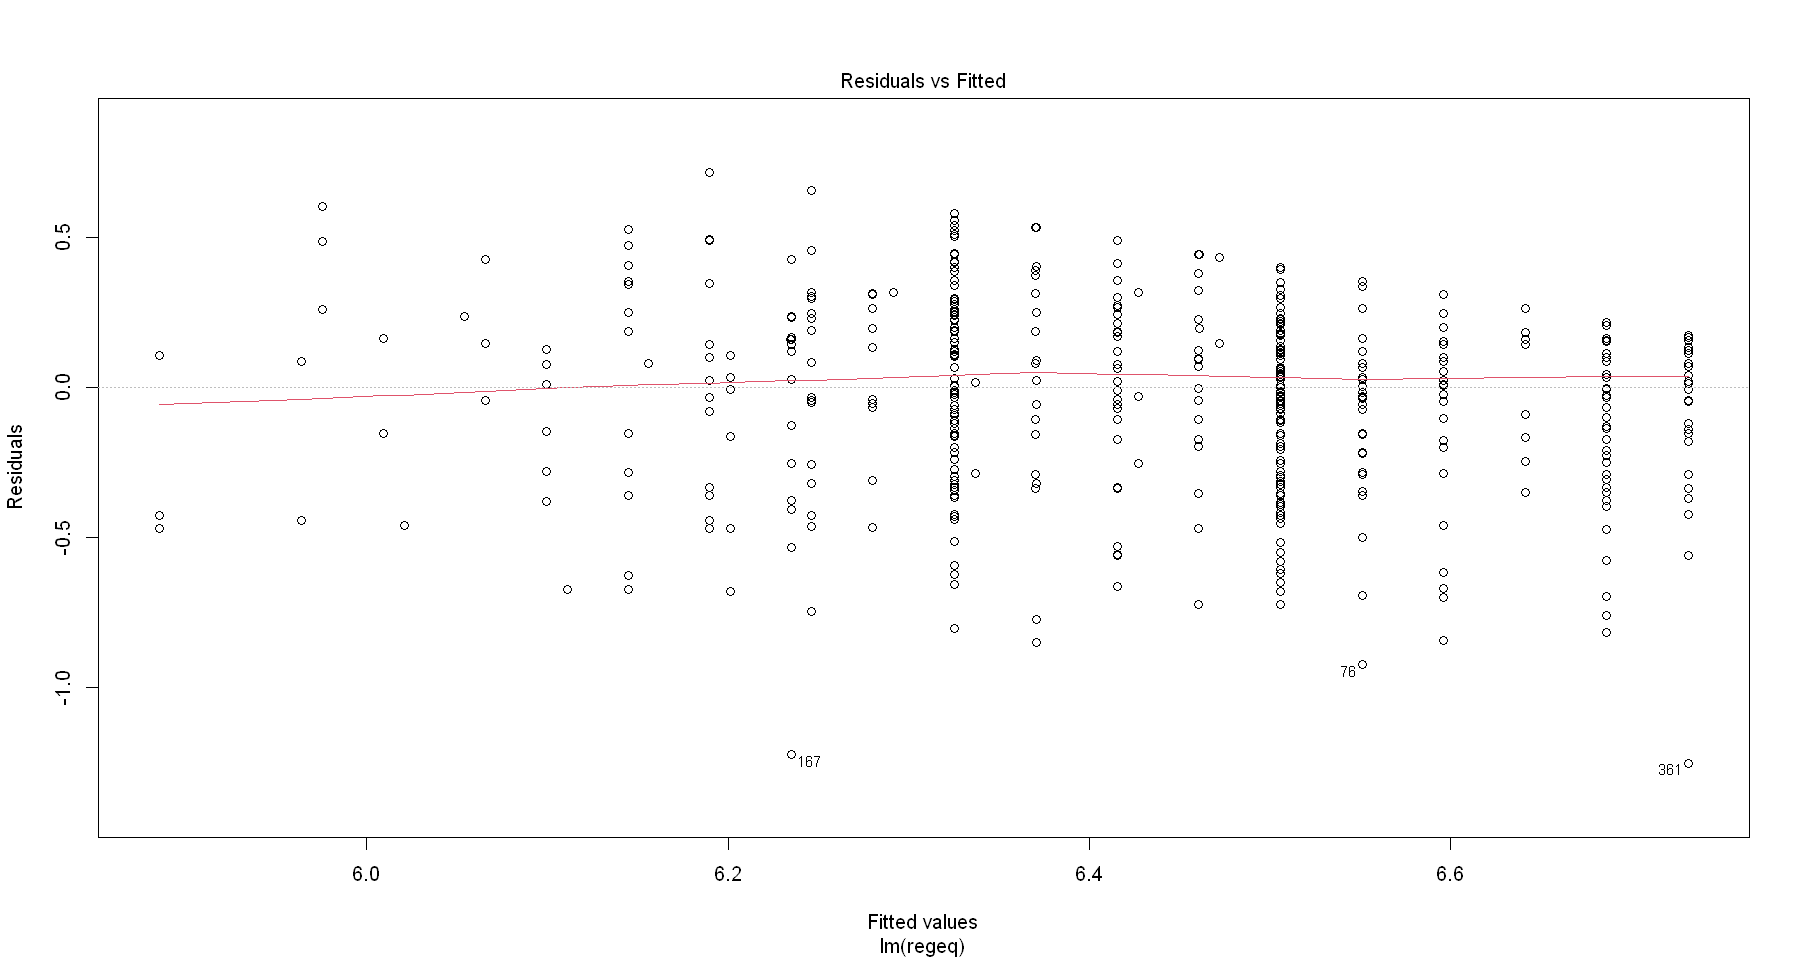

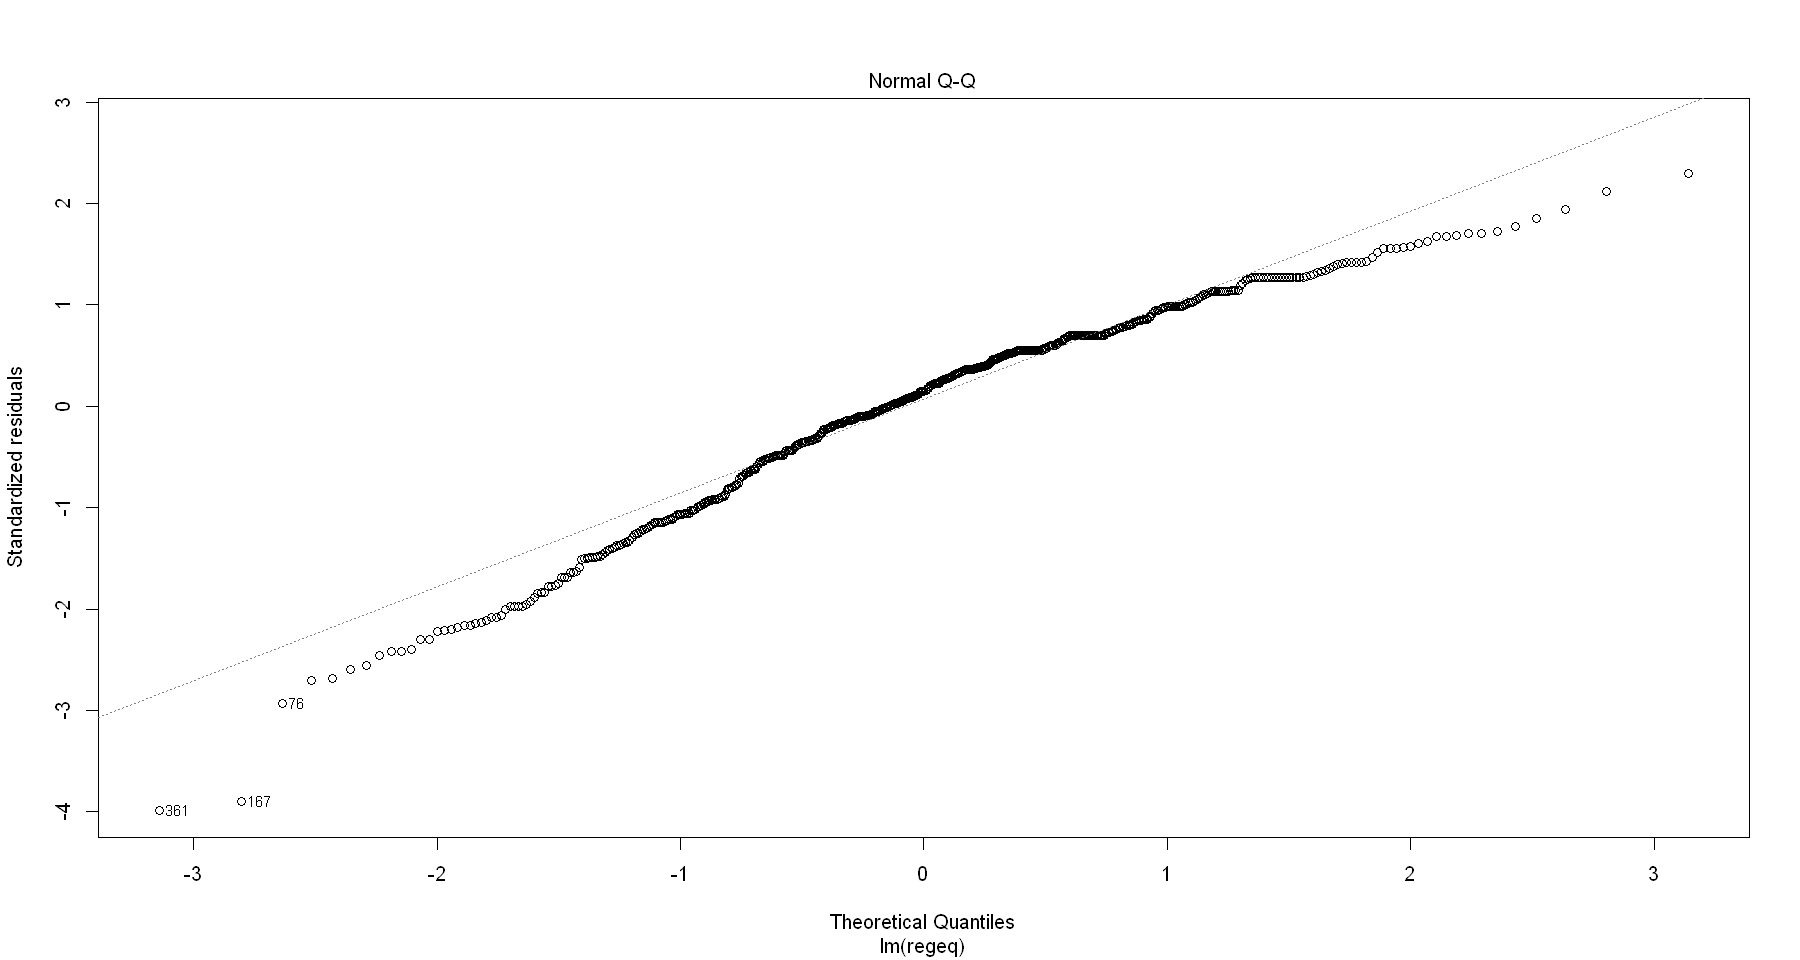

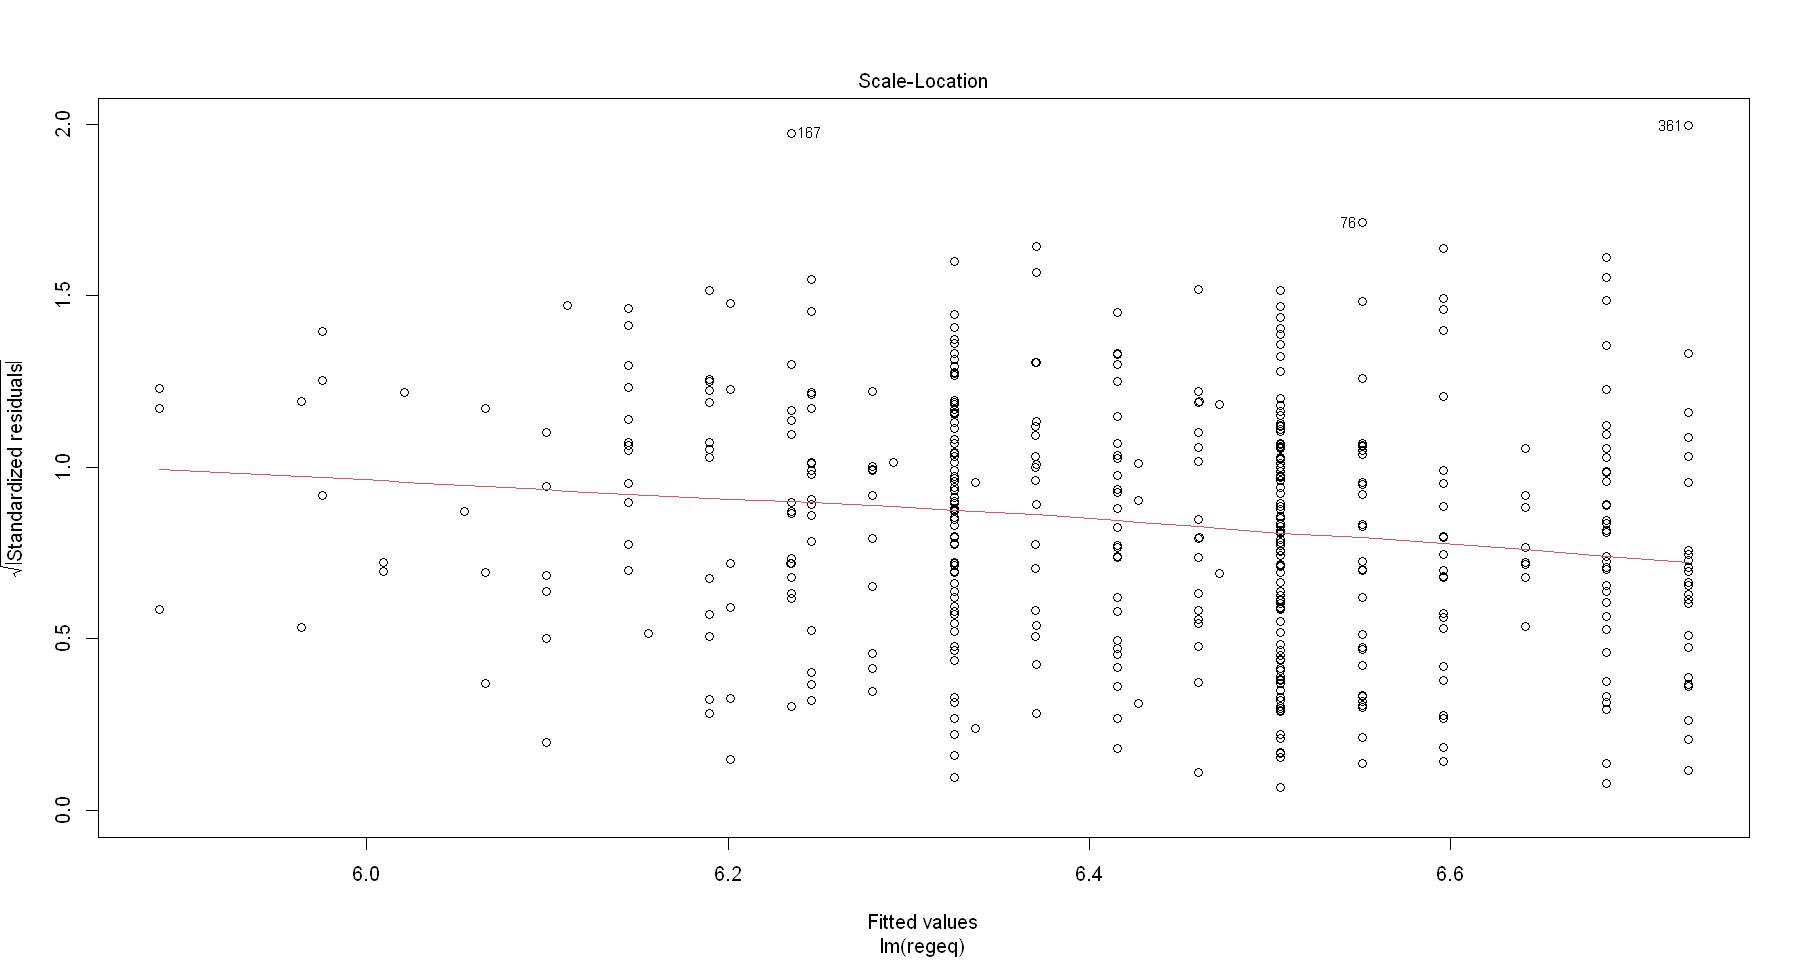

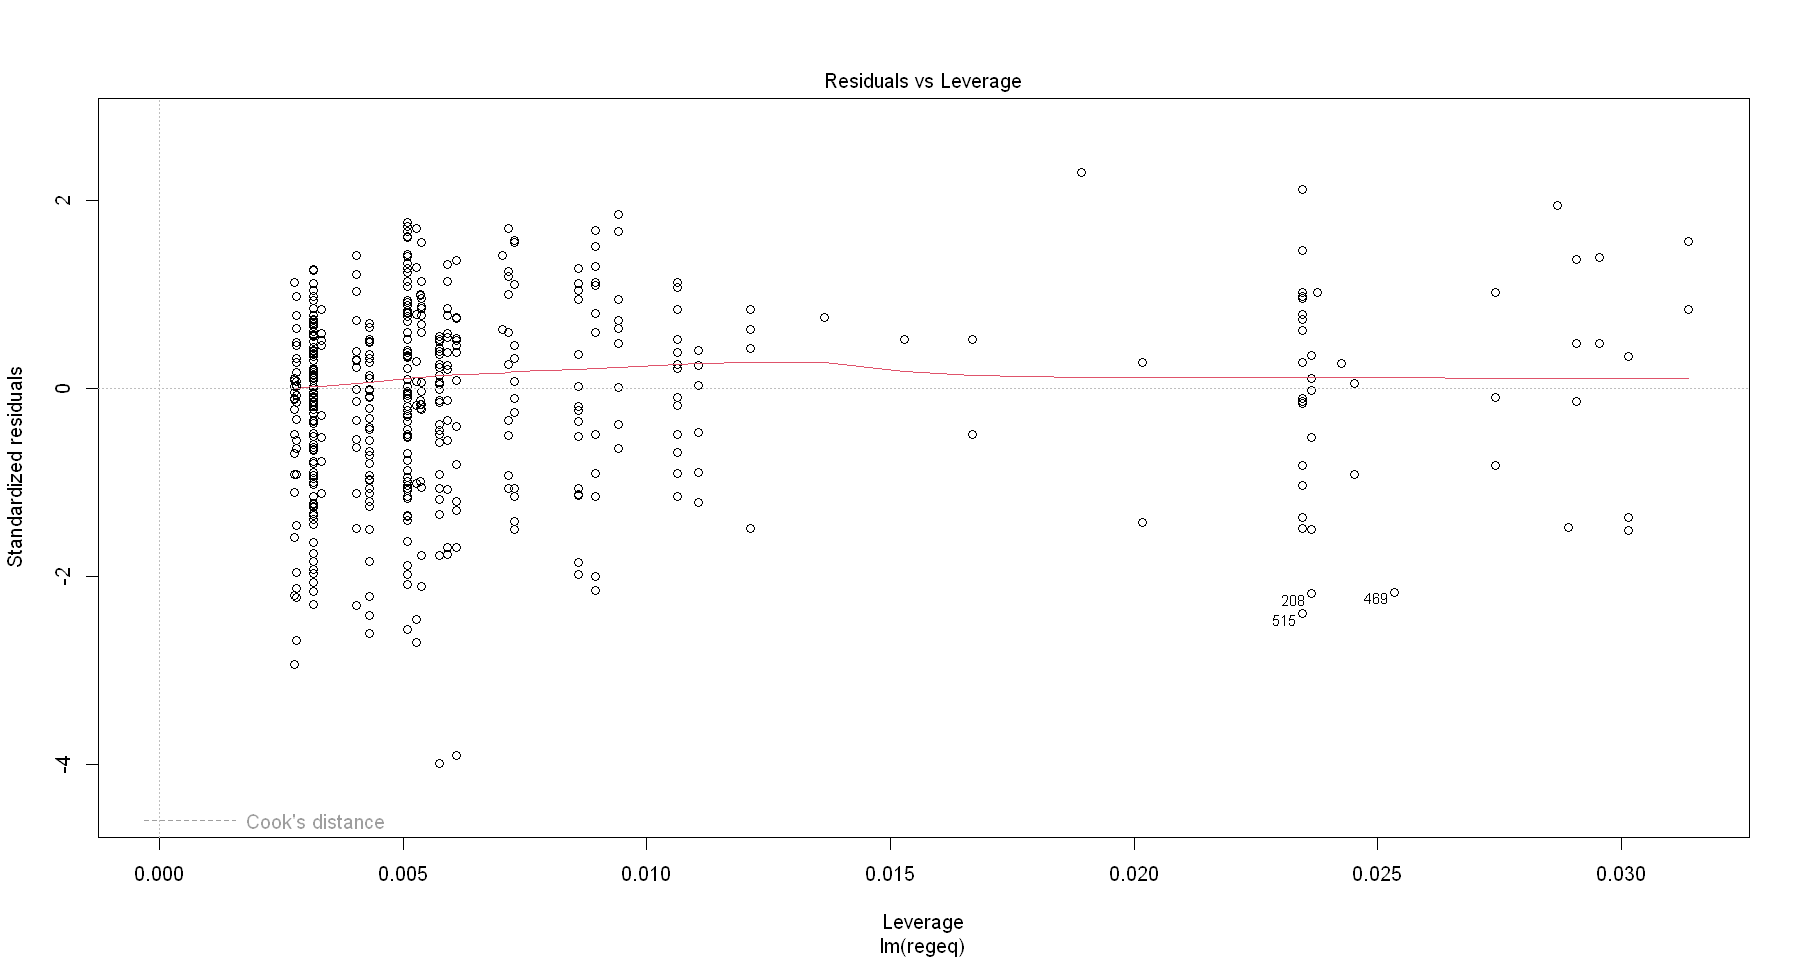

In [28]:
plot(groupols)

Does the residuals look like a white noise? Clearly not.

First, looking at the Residuals vs Fitted values, we suspect something strange. The red line is not always on zero, meaning that we have a slight issue on the definition of the equation that we defined (i.e., $ln(wage_i)= \beta_0 + \beta_1 ed_i + \beta_2 smsa_i + \beta_3 black_i + u_i.$).

Second, the normality assumption of the residuals is questioned from what we see on the Q-Q plot.

Third and most importantly, the third scatter plot advocates for heteroskedaticity (the spread of the residuals is increasing as the fitted values (or the independent variables) changes.

Thus, ignoring the slight issue with the definition of the relationship between wage and expl. variables, we suspect heteroskedasticity. We might think that it comes from the *black* outcome. We might have $V(\epsilon_i|black=yes)=\sigma^2_1$ and $V(\epsilon_i|black=no)=\sigma^2_2$, with $\sigma^2_1 \neq \sigma^2_2$.

To check that, we can use both Breusch-Pagan and Goldfeld-Quandt tests.

In [29]:
bptest(groupols) # Breusch Pagan test


	studentized Breusch-Pagan test

data:  groupols
BP = 9.6986, df = 3, p-value = 0.02131


At a $5\%$ critical probability, the null hypothesis of the Breusch-Pagan test is rejected, most probably indicating heteroskedasticity. So we know that we have heteroskedasticity, but where does it come from ? Maybe from *black*, as we suspected before ?

In order to properly use the Goldfeld-Quandt test, we need to sort the values of the *black* variable and give the breaking point when *black* changes from *no* to *yes*. The following R code gives the number of *no* and *yes* for the *black* variable.

In [30]:
swages %>% group_by(black) %>% count()

black,n
<fct>,<int>
no,552
yes,43


Thus, after sorting the values of the *black* variable, we know that the *black* value changes at the $553^{th}$ (among $552+43)$ observation. Furthermore, we say that we want a two-sided test because we just want to know if $\sigma^2_1 \neq \sigma^2_2$.

In [31]:
gqtest(regeq, point=552/(552+43), alternative="two.sided", order.by=swages$black, data=swages) # Goldfeld-Quandt test


	Goldfeld-Quandt test

data:  regeq
GQ = 1.392, df1 = 39, df2 = 548, p-value = 0.1222
alternative hypothesis: variance changes from segment 1 to 2


At a $5\%$ critical probability, the null hypothesis of the Goldfeld-Quandt test is not rejected, most probably indicating no group specific heteroskedasticity with the *black* variable. Thus, you could stop there and just apply the FGLS for the heteroskedasticity detected by the Breusch-Pagan test and disregard the *black* variable for group specific variance.

If you chosed a $15\%$ critical probability, the null hypothesis of the Goldfeld-Quandt test is rejected, most probably indicating group specific heteroskedasticity with the *black* variable. Therefore, you could use the FGLS estimator using the following code.

In [32]:
regeq2 <- lwage ~ ed + smsa

regnotblack <- lm(regeq2, data = swages, subset = (black == 'no'))
signotblack <- summary(regnotblack)$sigma
regblack <- lm(regeq2, data = swages, subset = (black == 'yes')) 
sigblack <- summary(regblack)$sigma
swages$weight <- rep(0, nrow(swages))

for (i in 1:nrow(swages))
{
  if (swages$black[i] == 'no'){swages$weight[i] <- 1 / signotblack^2}
  else{swages$weight[i] <- 1 / sigblack^2}
}

fgls <- lm(regeq, weights = weight, data = swages)
summary(fgls)


Call:
lm(formula = regeq, data = swages, weights = weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-4.0178 -0.5572  0.1453  0.7069  2.2910 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.787240   0.061709  93.783  < 2e-16 ***
ed           0.044803   0.004757   9.419  < 2e-16 ***
smsayes      0.181745   0.028028   6.484 1.88e-10 ***
blackyes    -0.260143   0.057537  -4.521 7.43e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9996 on 591 degrees of freedom
Multiple R-squared:  0.2435,	Adjusted R-squared:  0.2396 
F-statistic:  63.4 on 3 and 591 DF,  p-value: < 2.2e-16
